# Install  library from TestPypi repo [link here](https://test.pypi.org/project/neural-net-numpy/0.1.2/)
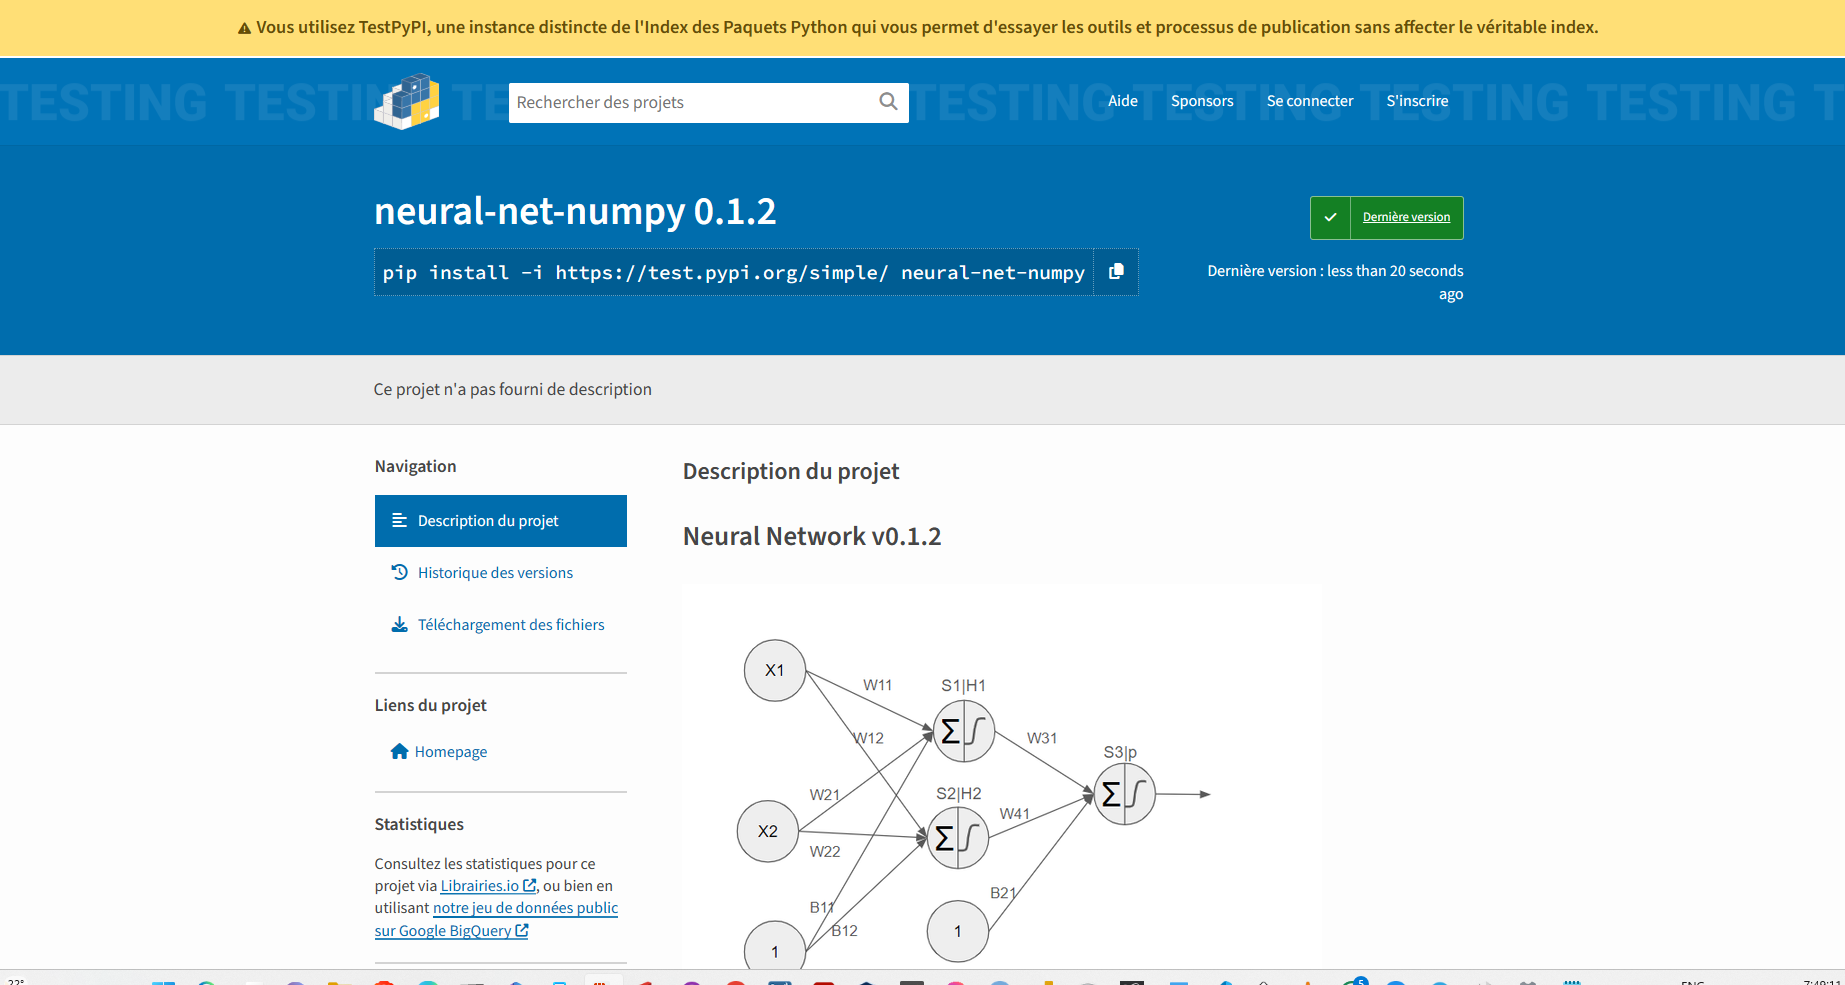

## Check python version (requirement python >=3.8)

In [1]:
!python --version

Python 3.11.7


In [17]:
!pip install --upgrade pip
!pip install -i https://test.pypi.org/simple/ neural-net-numpy==0.1.4

Looking in indexes: https://test.pypi.org/simple/


## Check install

In [18]:
!python -c "import neural_net;print(neural_net.__version__)"

0.1.0


# Import other libraries

* <a href="https://pandas.pydata.org/docs/index.html" target="_parent" >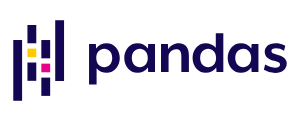</a> 
* <a href="https://pandas.pydata.org/docs/index.html" target="_parent" >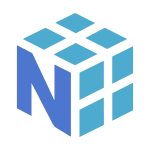</a>
* <a href="https://pandas.pydata.org/docs/index.html" target="_parent" >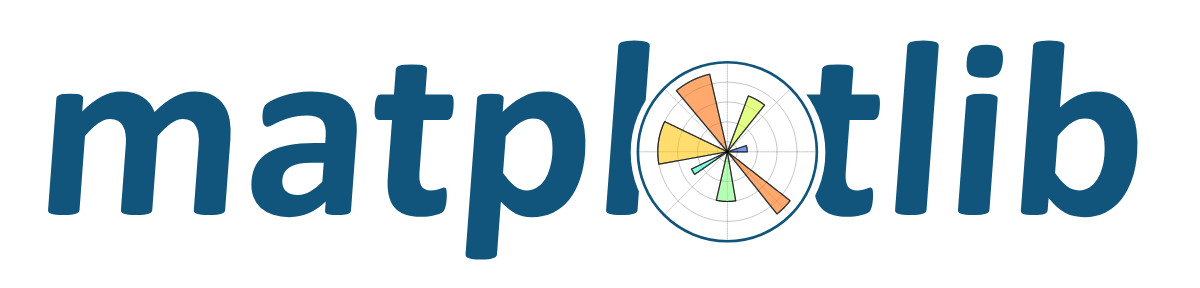</a>

In [1]:
import numpy,pandas
import matplotlib.pyplot as plt

# Activation functions

In [2]:
z = numpy.linspace(-6,6,1000+1)

## Sigmoid and Tanh

### Function values

In [3]:
from neural_net.activation import σ,Tanh

In [4]:
sigmoid = σ()
tanh    = Tanh()

In [5]:
sigmoid.compute(z)

array([0.00247262, 0.0025024 , 0.00253253, ..., 0.99746747, 0.9974976 ,
       0.99752738])

In [6]:
tanh.compute(z)

array([-1.99997542, -1.99997483, -1.99997421, ...,  1.99997421,
        1.99997483,  1.99997542])

In [7]:
sigmoid.preds

array([0.00247262, 0.0025024 , 0.00253253, ..., 0.99746747, 0.9974976 ,
       0.99752738])

In [8]:
tanh.preds

array([-1.99997542, -1.99997483, -1.99997421, ...,  1.99997421,
        1.99997483,  1.99997542])

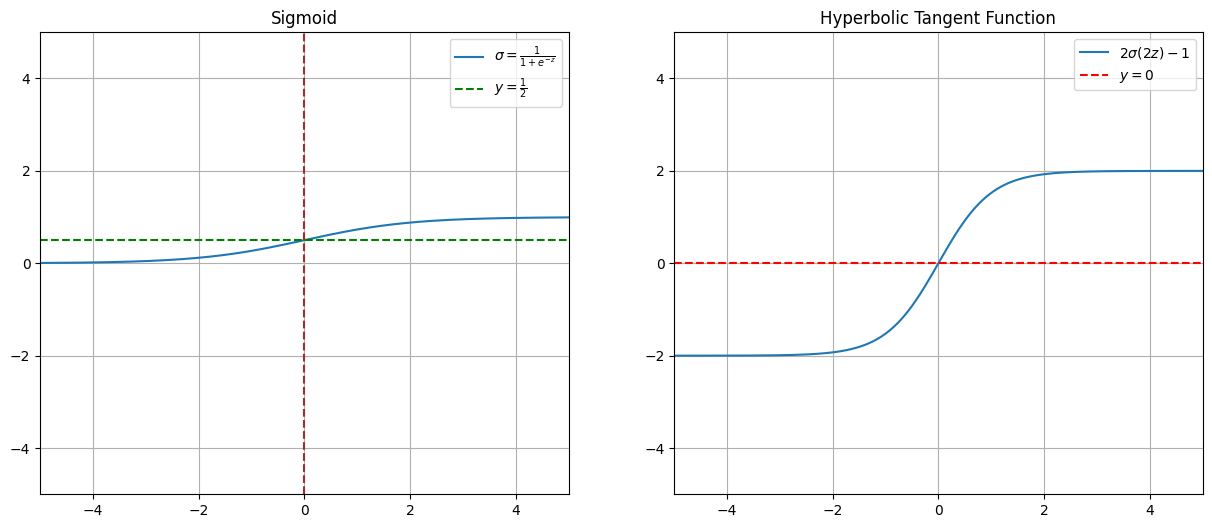

In [9]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax1.plot(z,sigmoid.preds,label=r'$\sigma=\frac{1}{1+e^{-z}}$')
ax2.plot(z,tanh.preds,label='$2\sigma(2z) - 1$')

ax1.hlines(y=0.5,xmin=-5,xmax=5,color='green',label=r'$y=\frac{1}{2}$',linestyle='--')
ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')


ax2.hlines(y=0,xmin=-5,xmax=5,color='red',label=r'$y=0$',linestyle='--')

ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.set_xlim(-5,5)

ax1.legend()
ax2.legend()

ax1.set_title('Sigmoid')
ax2.set_title('Hyperbolic Tangent Function')

ax1.grid()
ax2.grid()

### Derivatives

In [10]:
sigmoidpr = sigmoid.pr()

In [11]:
tanhpr = tanh.pr()

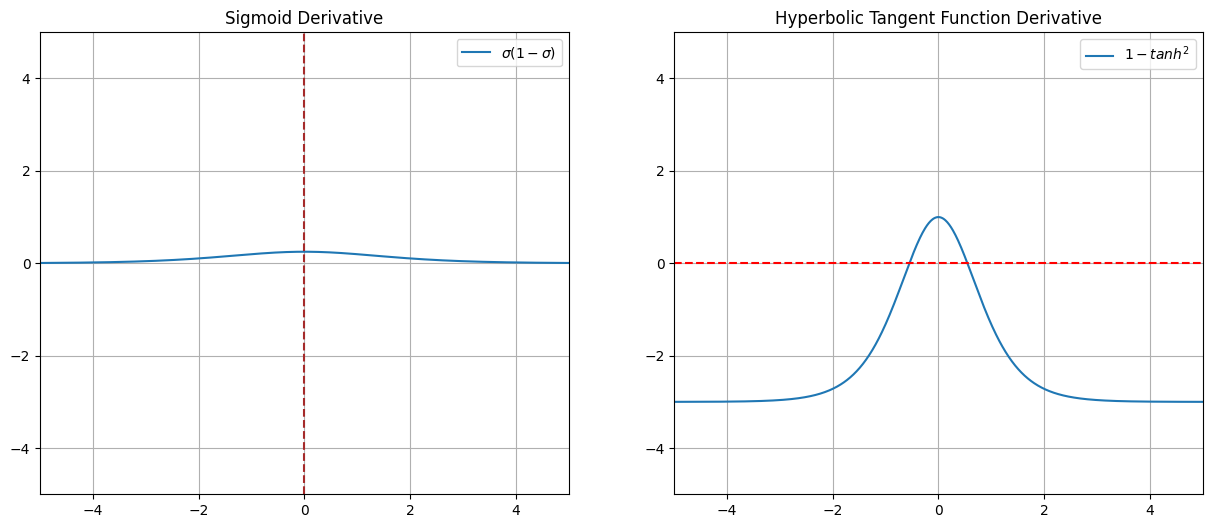

In [12]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax1.plot(z,sigmoidpr,label=r'$\sigma(1-\sigma)$')
ax2.plot(z,tanhpr,label='$1 - tanh^2$')

ax1.hlines(y=0.25,xmin=65,xmax=5,color='green',linestyle='--')
ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')


ax2.hlines(y=0,xmin=-5,xmax=5,color='red',linestyle='--')

ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.set_xlim(-5,5)

ax1.legend()
ax2.legend()

ax1.set_title('Sigmoid Derivative')
ax2.set_title('Hyperbolic Tangent Function Derivative')

ax1.grid()
ax2.grid()

## Rectified Linear Unit (ReLU)

### Function values
$$
    \mathrm{\mathit{H}}(z) = \begin{cases}
        z & \text{if } z \geq 0  \\ % & is your "\tab"
        0 & \text{if } z < 0
    \end{cases}
    $$

In [13]:
from neural_net.activation import ReLU

In [14]:
relu = ReLU()

In [15]:
relupred = relu.compute(z)
relupred

array([0.   , 0.   , 0.   , ..., 5.976, 5.988, 6.   ])

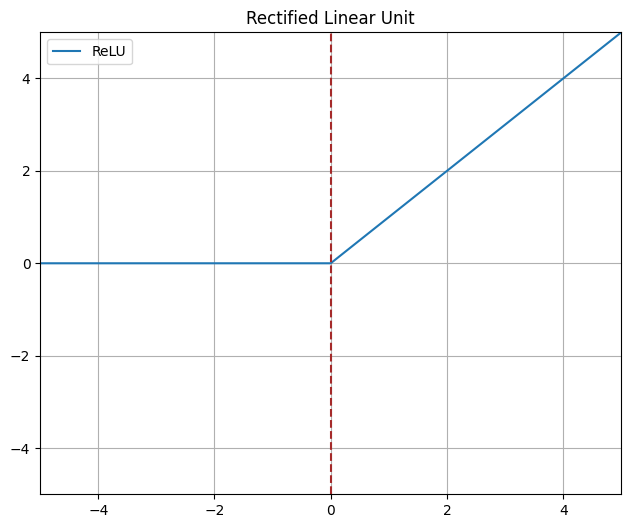

In [16]:
fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(7.5,6))

ax1.plot(z,relupred,label=r'ReLU')

ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')



ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)
ax1.legend()

ax1.set_title('Rectified Linear Unit')

ax1.grid()

### Derivative

$$
\mathrm{\mathit{H}}(z) = \begin{cases}
1 & \text{if } z \geq 0  \\
0 & \text{if } z < 0
\end{cases}
$$

In [17]:
relupr = relu.pr()
relupr

array([0, 0, 0, ..., 1, 1, 1])

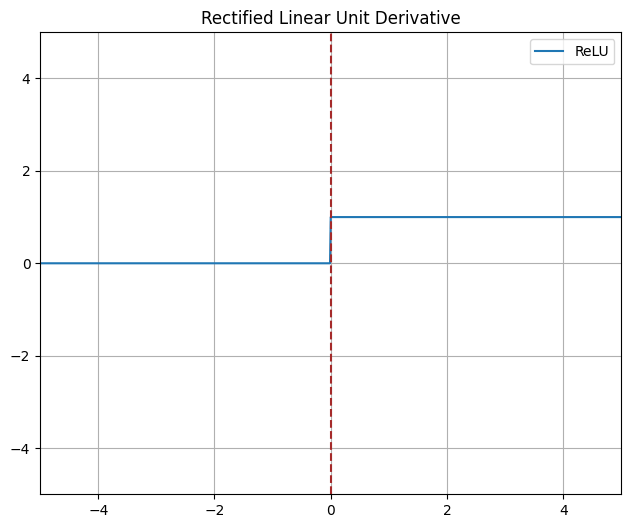

In [18]:
fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(7.5,6))

ax1.plot(z,relupr,label=r'ReLU')

ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')



ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)

ax1.legend()

ax1.set_title('Rectified Linear Unit Derivative')

ax1.grid()

## Non Saturating activations

### Function values
- Leaky Rectified Linear Unit(Leaky ReLU)
$$
\mathrm{\mathit{H}}(z) = \begin{cases}
 z & \text{if }  z \geq 0  \\ 
 \alpha z & \text{if } z < 0
\end{cases}
$$

- Exponential Linear Unit(ELU)
$$
\mathrm{\mathit{H}}(z) = \begin{cases}
    z & \text{if } z \geq 0  \\ 
    \alpha (e^{z} - 1) & \text{if } z < 0
\end{cases}
$$

In [19]:
from neural_net.activation import ELU,LeakyReLU

In [20]:
elu = ELU(α=1)
leakyrelu = LeakyReLU(α=.1)

In [21]:
elupred,leakyrelupred = elu.compute(z),leakyrelu.compute(z)

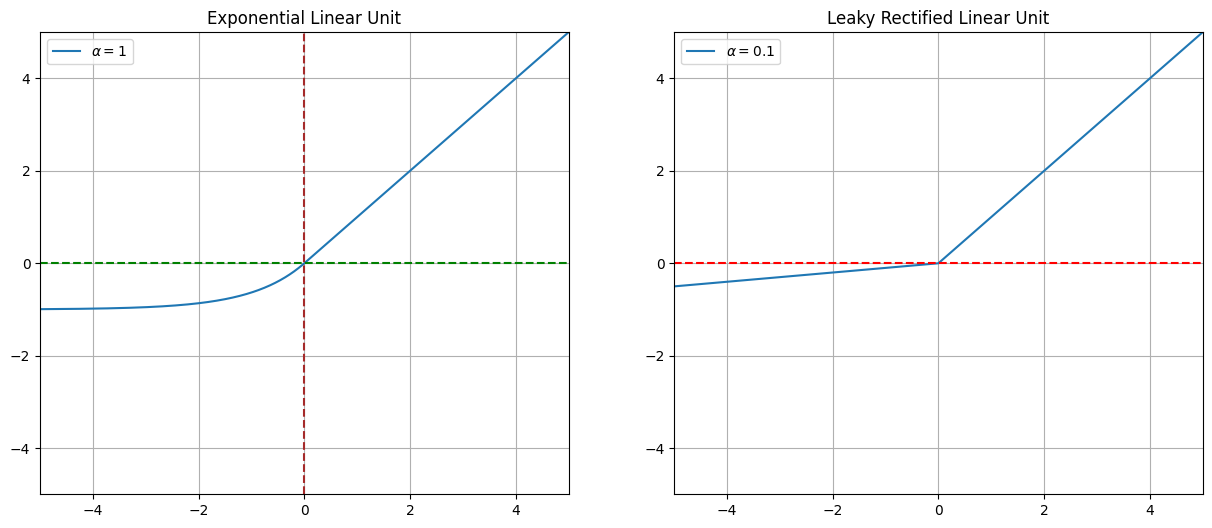

In [22]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax1.plot(z,elupred,label=r'$\alpha=1$')
ax2.plot(z,leakyrelupred,label=r'$\alpha=0.1$')

ax1.hlines(y=0,xmin=-5,xmax=5,color='green',linestyle='--')
ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')


ax2.hlines(y=0,xmin=-5,xmax=5,color='red',linestyle='--')

ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.set_xlim(-5,5)
ax1.legend()
ax2.legend()

ax1.set_title('Exponential Linear Unit')
ax2.set_title('Leaky Rectified Linear Unit')

ax1.grid()
ax2.grid()

### Derivatives
- ELU
$$
\mathrm{\mathit{H}}'(z) = \begin{cases}
 1 & \text{if } z \geq 0  \\ % &
  \mathrm{\mathit{H}}(z) + \alpha & \text{if } z < 0
  \end{cases}
$$ 
- Leaky ReLU
$$
\mathrm{\mathit{H}}'(z) = \begin{cases}
 1 & \text{if } z \geq 0  \\ % &
  \alpha & \text{if } z < 0
  \end{cases}
$$

In [23]:
elupr,leakypr = elu.pr(),leakyrelu.pr()

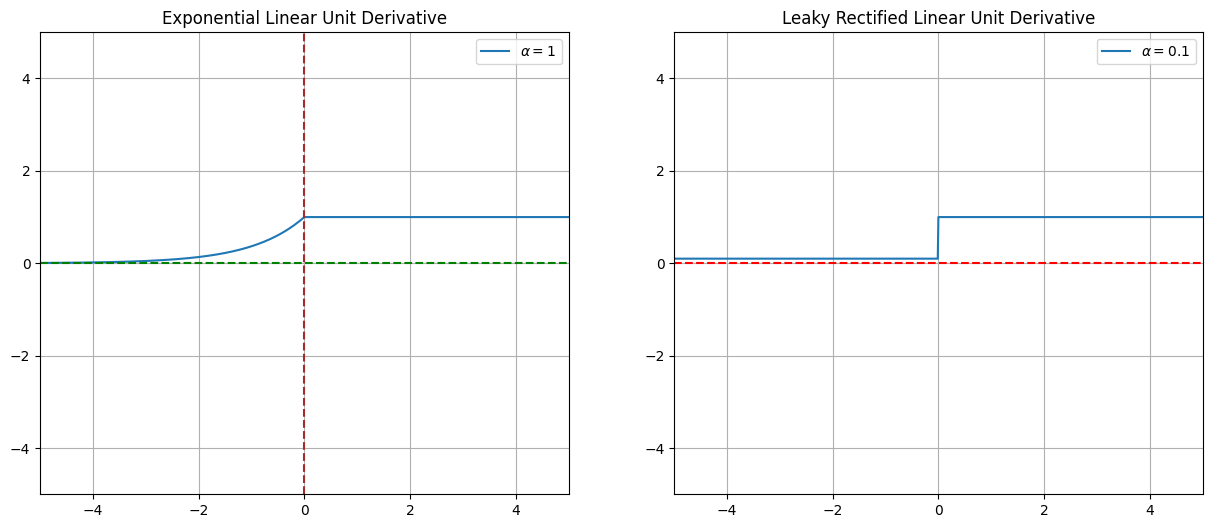

In [24]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax1.plot(z,elupr,label=r'$\alpha=1$')
ax2.plot(z,leakypr,label=r'$\alpha=0.1$')

ax1.hlines(y=0,xmin=-5,xmax=5,color='green',linestyle='--')
ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')


ax2.hlines(y=0,xmin=-5,xmax=5,color='red',linestyle='--')

ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.set_xlim(-5,5)
ax1.legend()
ax2.legend()

ax1.set_title('Exponential Linear Unit Derivative')
ax2.set_title('Leaky Rectified Linear Unit Derivative')

ax1.grid()
ax2.grid()

## All common activation function and their derivatives

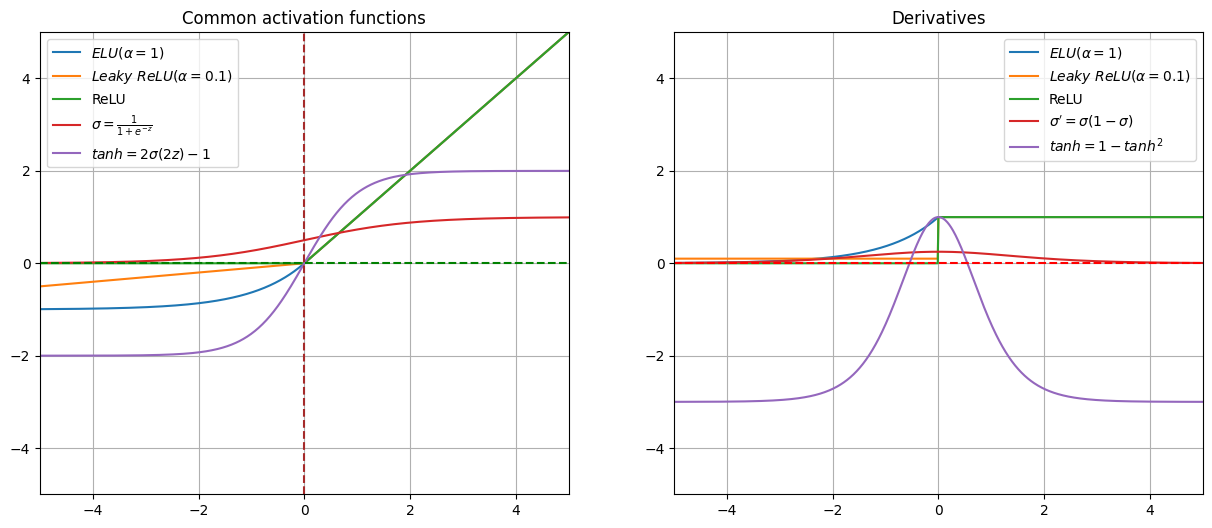

In [25]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax1.plot(z,elu.preds,label=r'$ELU(\alpha=1)$')
ax1.plot(z,leakyrelu.preds,label=r'$Leaky\ ReLU(\alpha=0.1)$')
ax1.plot(z,relu.preds,label=r'ReLU')
ax1.plot(z,sigmoid.preds,label=r'$\sigma=\frac{1}{1+e^{-z}}$')
ax1.plot(z,tanh.preds,label='$tanh=2\sigma(2z) - 1$')


ax2.plot(z,elupr,label=r'$ELU(\alpha=1)$')
ax2.plot(z,leakypr,label=r'$Leaky\ ReLU(\alpha=0.1$)')
ax2.plot(z,relupr,label=r'ReLU')
ax2.plot(z,sigmoidpr,label=r"$\sigma'=\sigma(1-\sigma)$")
ax2.plot(z,tanhpr,label='$tanh=1 - tanh^2$')

ax1.hlines(y=0,xmin=-5,xmax=5,color='green',linestyle='--')
ax1.vlines(x=0,ymin=-5,ymax=5,color='brown',linestyle='--')


ax2.hlines(y=0,xmin=-5,xmax=5,color='red',linestyle='--')

ax1.set_ylim(-5,5)
ax1.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.set_xlim(-5,5)
ax1.legend()
ax2.legend()

ax1.set_title('Common activation functions')
ax2.set_title('Derivatives')

ax1.grid()
ax2.grid()

# Initialization

In [26]:
from neural_net.init_funcs import XavierHe, zeros

## Weights + Bias

In [34]:
n_cols = 2

### Zeros

In [35]:
W = zeros(n_cols,1)
W

array([[0.],
       [0.],
       [0.]])

In [36]:
W = zeros(n_cols,1,biais=False)
W

array([[0.],
       [0.]])

## Xavier and He

<a href="https://imgbb.com/"><img src="https://i.ibb.co/FHwxjmL/Screenshot-2024-03-03-084231.png" alt="Screenshot-2024-03-03-084231" border="0"></a>


In [37]:
initializer = XavierHe("Normal","Sigmoid").init_func

In [38]:
initializer(n_cols,1)

array([[ 1.08529782],
       [ 0.55315106],
       [-1.20349346]])

In [39]:
initializer(n_cols,1,biais=False)

array([[0.14914699],
       [0.68662846]])

### Normal distribution

In [105]:
n_cols = 1000

In [106]:
xe_norm_sigmoid = XavierHe("Normal","Sigmoid").init_func(n_cols,1,biais=False)
xe_norm_tanh = XavierHe("Normal","Tanh").init_func(n_cols,1,biais=False)
xe_norm_relu = XavierHe("Normal","ReLU").init_func(n_cols,1,biais=False)


In [107]:
xe_norm_sigmoid.shape

(1000, 1)

In [108]:
std,m = xe_norm_sigmoid.std(),xe_norm_sigmoid.mean()
std,m

(0.04489498522857033, -0.0007231213204853488)

In [109]:
(( xe_norm_sigmoid >= m-std) & (xe_norm_sigmoid<=m+std)).sum()

697

In [113]:
697/n_cols

0.697

In [114]:
(( xe_norm_sigmoid >= m-2*std) & (xe_norm_sigmoid<=m+2*std)).sum()/n_cols

0.95

In [115]:
(( xe_norm_sigmoid >= m-3*std) & (xe_norm_sigmoid<=m+3*std)).sum()/n_cols

0.997

In [116]:
xe_norm_tanh.std(),xe_norm_relu.std()

(0.1711681672411125, 0.06410140383405528)

(-0.726385463544662, 0.6217518101350396, 0.0, 111.3)

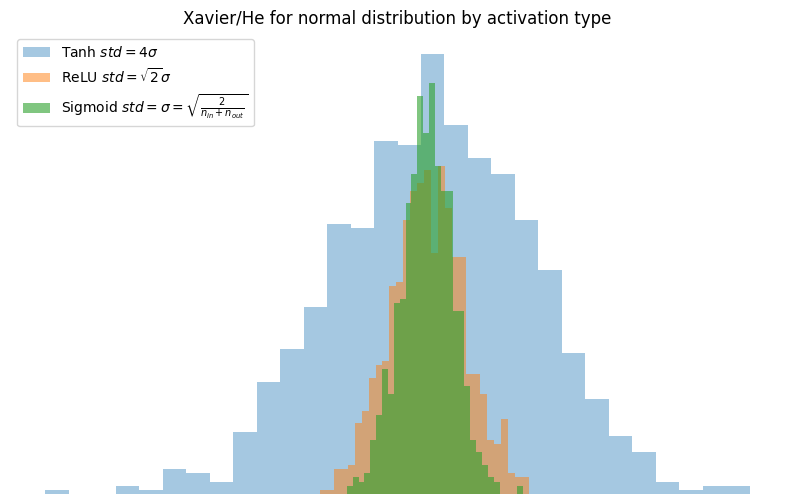

In [130]:
plt.figure(figsize=(10,6))

plt.title('Xavier/He for normal distribution by activation type')
plt.hist(xe_norm_tanh,label=r'Tanh $std=4\sigma$',bins=30,alpha=.4)
plt.hist(xe_norm_relu,label=r'ReLU $std=\sqrt{2}\sigma$',bins=30,alpha=.5)
plt.hist(xe_norm_sigmoid,label=r'Sigmoid $std=\sigma=\sqrt{\frac{2}{n_{in}+n_{out}}}$',bins=30,alpha=.6)

plt.legend(loc='upper left')
plt.axis('off')

### Uniform distribution

In [128]:
xe_uni_sigmoid = XavierHe("Uniform","Sigmoid").init_func(n_cols,1,biais=False)
xe_uni_tanh = XavierHe("Uniform","Tanh").init_func(n_cols,1,biais=False)
xe_uni_relu = XavierHe("Uniform","ReLU").init_func(n_cols,1,biais=False)


In [135]:
xe_uni_sigmoid.min()

-0.07708092487365578

In [136]:
xe_uni_sigmoid.max()

0.0770798990273792

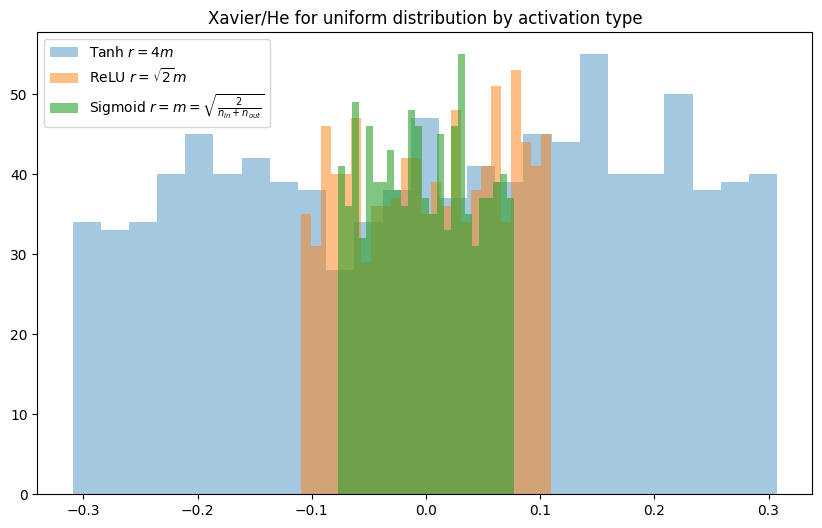

In [140]:
plt.figure(figsize=(10,6))

plt.title('Xavier/He for uniform distribution by activation type')
plt.hist(xe_uni_tanh,label=r'Tanh $r=4m$',bins=25,alpha=.4)
plt.hist(xe_uni_relu,label=r'ReLU $r=\sqrt{2}m$',bins=25,alpha=.5)
plt.hist(xe_uni_sigmoid,label=r'Sigmoid $r=m=\sqrt{\frac{2}{n_{in}+n_{out}}}$',bins=25,alpha=.6)

plt.legend(loc='upper left')


# Layers

In [142]:
from neural_net.layers import Fullyconnected,Activation


## Linear Layer

In [158]:
fc = Fullyconnected(n_in=2,n_out=1,init_method=zeros)

In [159]:
repr(fc)

'Fullyconnected'

In [160]:
str(fc)

'Layer'

In [161]:
fc.id

{'id': 140377909934032,
 'Layer_id': 140377909934032,
 'name': 'Fullyconnected',
 'self': Fullyconnected,
 'n_in': 2,
 'n_out': 1,
 'init_method': <function neural_net.init_funcs.zeros(n_in: int, n_out: int, biais: bool = True) -> <built-in function array>>,
 'func': neural_net.activation.Σ,
 'steps': []}

In [162]:
fc['id']

140377909934032

In [163]:
fc.id['id']

140377909934032

In [164]:
fc.func

Σ

## Linear activation

In [166]:
linear_activation = fc.func
linear_activation

Σ

In [167]:
str(linear_activation)

'Neurons'

In [168]:
repr(linear_activation)

'Σ'

In [169]:
linear_activation.id

{'id': 140377909866128,
 'Neurons_id': 140377909866128,
 'name': 'Σ',
 'self': Σ,
 'Layer_id': 140377909934032,
 'Layer_Layer_id': 140377909934032,
 'Layer_name': 'Fullyconnected',
 'Layer_self': Fullyconnected,
 'Layer_n_in': 2,
 'Layer_n_out': 1,
 'Layer_init_method': <function neural_net.init_funcs.zeros(n_in: int, n_out: int, biais: bool = True) -> <built-in function array>>,
 'Layer_func': neural_net.activation.Σ,
 'steps': []}

In [170]:
linear_activation.W

array([[0.],
       [0.],
       [0.]])

In [171]:
linear_activation.W.shape

(3, 1)

## activation layer

In [172]:
sigmoid_activation = Activation(func=σ)

In [173]:
sigmoid_activation

Activation

In [174]:
str(sigmoid_activation)

'Layer'

In [175]:
sigmoid_activation.id

{'id': 140377909680656,
 'Layer_id': 140377909680656,
 'name': 'Activation',
 'self': Activation,
 'func': neural_net.activation.σ,
 'kargs': (),
 'steps': []}

# Architecture

In [1]:
from neural_net.architecture import Sequential
from neural_net.layers import Fullyconnected,Activation
from neural_net.init_funcs import zeros
from neural_net.activation import σ
from neural_net.cost import BinaryCrossEntropy

In [2]:
network = Sequential(
        [
        Fullyconnected(2,10,zeros),
        Activation(σ),
        Fullyconnected(10,1,zeros),
        Activation(σ)
        ]
    ,BinaryCrossEntropy)

In [3]:
repr(network)

'Sequential'

In [4]:
str(network)

'Architecture'

In [6]:
network['steps']

[Fullyconnected, Activation, Fullyconnected, Activation]

In [7]:
network.id.keys()

dict_keys(['id', 'Architecture_id', 'name', 'self', 'steps', 'cost', 'store'])

In [8]:
network['id']

140379602988880

In [9]:
network.id['id']

140379602988880

# Adding Database

In [13]:
network = Sequential(
        [
        Fullyconnected(2,50,zeros),
        Activation(σ),
        Fullyconnected(50,2,zeros),
        Activation(σ)
        ]
    ,BinaryCrossEntropy,store=True)

In [14]:
network.session

In [15]:
network.db_path

'sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db'

In [21]:
utc_ts = network.db_path.split('/')[-1][5:-3]
utc_ts

'1709575905'

In [20]:
import datetime

In [24]:
datetime.datetime.fromtimestamp(int(utc_ts)).isoformat()

'2024-03-04T18:11:45'

In [31]:
db_folder = '/'.join(network.db_path.split('/')[3:-1])
db_folder

'/home/analyst/notebooks/module/neural_net/run'

In [32]:
%ls  $db_folder/*db|tail -n 3

/home/analyst/notebooks/module/neural_net/run/model1709575470.db
/home/analyst/notebooks/module/neural_net/run/model1709575647.db
/home/analyst/notebooks/module/neural_net/run/model1709575905.db


In [37]:
network.engines

{'sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db': Engine(sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db)}

In [38]:
network.engines.get(network.db_path)

Engine(sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db)

In [43]:
cursor = network.engines.get(network.db_path).connect()

In [44]:
from sqlalchemy import text

In [48]:
res = cursor.execute(text('''

        SELECT * 
        FROM
        sqlite_schema

'''))
pandas.DataFrame(res.fetchall())

,type,name,tbl_name,rootpage,sql
0,table,Architecture,Architecture,2,"CREATE TABLE ""Architecture"" (\n\tid INTEGER NO..."
1,table,Layer,Layer,3,"CREATE TABLE ""Layer"" (\n\t""Architecture_id"" IN..."
2,table,Cost,Cost,4,"CREATE TABLE ""Cost"" (\n\t""Architecture_id"" INT..."
3,table,Neurons,Neurons,5,"CREATE TABLE ""Neurons"" (\n\t""Layer_id"" INTEGER..."
4,table,Weight,Weight,6,"CREATE TABLE ""Weight"" (\n\tvalue INTEGER, \n\t..."


# Generating Linearly seperable data

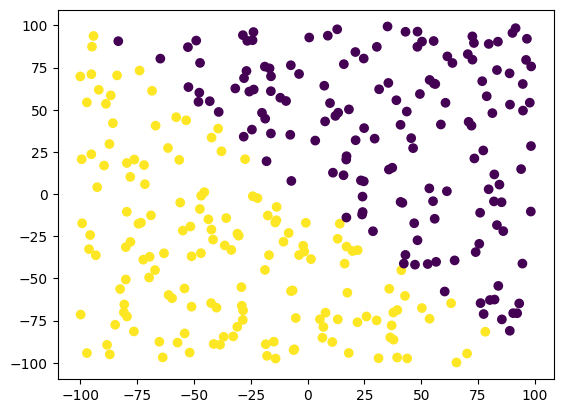

In [49]:
n,k = 300,2
X = numpy.random.uniform(-100,100,size=(n,k))
y = (X.sum(axis=1) < numpy.random.uniform(.3,.37,(len(X),))).reshape(-1,1)+0
plt.scatter(x=X[:,0],y=X[:,1],c=y)


# Forward Feeding data to network

In [50]:
for layer in network:
    print(repr(layer))

Fullyconnected
Activation
Fullyconnected
Activation


In [51]:
layer.func

σ

In [52]:
out = X
for layer in network:
    out = layer.func.compute(out)

In [54]:
out

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5,

In [56]:
out.shape

(300, 2)

In [55]:
network.predict(X)
network.out.shape

(300, 2)

# Exploring database

In [57]:
%load_ext sql
%sql $network.db_path

## Architecture

In [65]:
%%sql

SELECT *
FROM Architecture

 * sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db
Done.


id,created_at,updated_at,name,Architecture_id
1,2024-03-04 18:11:45.895299,2024-03-04 18:11:45.895302,Sequential,140379602670032
2,2024-03-04 18:17:26.316307,2024-03-04 18:17:26.316315,Sequential,140379603024400


In [66]:
network['id']

140379603024400

## Costs

In [70]:
%%sql

SELECT *
FROM cost
WHERE Architecture_id = 140379603024400

 * sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db
Done.


Architecture_id,value,id,created_at,updated_at,name,Cost_id
140379603024400,None,2,2024-03-04 18:17:26.591265,2024-03-04 18:17:26.591271,BinaryCrossEntropy,140379601731216


## Layers

In [63]:
%%sql   

SELECT * 
FROM layer 
WHERE Architecture_id=140379603024400

 * sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db
Done.


Architecture_id,n_in,n_out,id,created_at,updated_at,name,Layer_id
140379603024400,2,50,5,2024-03-04 18:17:26.327160,2024-03-04 18:17:26.327167,Fullyconnected,140379603033872
140379603024400,None,None,6,2024-03-04 18:17:26.327168,2024-03-04 18:17:26.513963,Activation,140379602907280
140379603024400,50,2,7,2024-03-04 18:17:26.327169,2024-03-04 18:17:26.547988,Fullyconnected,140379601709072
140379603024400,None,None,8,2024-03-04 18:17:26.327170,2024-03-04 18:17:26.572231,Activation,140379601815760


## Neurons

In [64]:
%%sql   

SELECT * 
FROM neurons 
WHERE layer_id=140379603033872

 * sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db
Done.


Layer_id,id,created_at,updated_at,name,Neurons_id
140379603033872,1,2024-03-04 18:17:26.330924,2024-03-04 18:17:26.330930,Σ,140379601518480


## Weights

In [83]:
%%sql

SELECT * 
FROM
weight WHERE neurons_id = 140379601518480
LIMIT 10

 * sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db
Done.


value,Neurons_id,id,created_at,updated_at,name,Weight_id
0,140379601518480,1,2024-03-04 18:17:26.341093,2024-03-04 18:17:26.341100,None,0_0
0,140379601518480,2,2024-03-04 18:17:26.341101,2024-03-04 18:17:26.341102,None,0_1
0,140379601518480,3,2024-03-04 18:17:26.341102,2024-03-04 18:17:26.341103,None,0_2
0,140379601518480,4,2024-03-04 18:17:26.341104,2024-03-04 18:17:26.341104,None,0_3
0,140379601518480,5,2024-03-04 18:17:26.341105,2024-03-04 18:17:26.341105,None,0_4
0,140379601518480,6,2024-03-04 18:17:26.341106,2024-03-04 18:17:26.341106,None,0_5
0,140379601518480,7,2024-03-04 18:17:26.341107,2024-03-04 18:17:26.341107,None,0_6
0,140379601518480,8,2024-03-04 18:17:26.341108,2024-03-04 18:17:26.341108,None,0_7
0,140379601518480,9,2024-03-04 18:17:26.341109,2024-03-04 18:17:26.341109,None,0_8
0,140379601518480,10,2024-03-04 18:17:26.341110,2024-03-04 18:17:26.341110,None,0_9


In [85]:
%%sql

SELECT count(*) n_neurons, AVG(value) mean_value
FROM
weight WHERE neurons_id = 140379601518480

 * sqlite:////home/analyst/notebooks/module/neural_net/run/model1709575905.db
Done.


n_neurons,mean_value
150,0.0


# Predict Method

In [86]:
network.predict(X)

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5,

# Cost functions

In [7]:
from neural_net.cost import BinaryCrossEntropy, CrossEntropy, MSE
from neural_net.utils import make_circle_data,IrisDatasetDownloader,HouseDatasetDownloader,Pearson,Boostrap
import numpy
import matplotlib.pyplot as plt

## Binary Crossentropy
$$
\mathrm{\mathit{Binary\ Cross\ Entropy}}(p, y) = \begin{cases}
-\log(p) & \text{if } y = 1, \\
-\log(1-p) & \text{otherwise.}
\end{cases}
$$

In [2]:
bcost = BinaryCrossEntropy()

### Circles dataset

(328, 2) (328, 1)


(-100.0, 100.0)

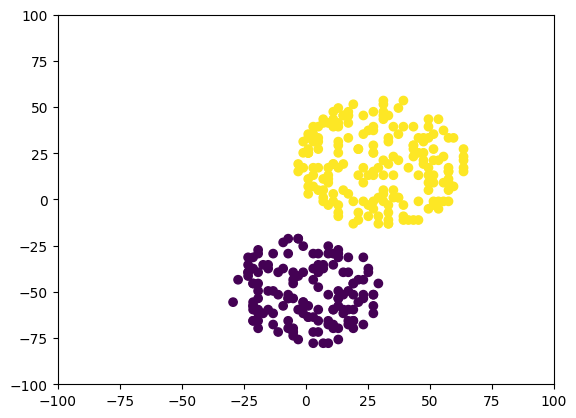

In [3]:
centers = [(-50, 0), (20, 30)]
radii = [30, 35]
X, y = make_circle_data(centers, radii)
print(X.shape, y.shape)
ax = plt.subplot()
ax.scatter(X[:,0],X[:,1],c=y)
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)

In [4]:
dum_classifier = numpy.random.random(len(y))
dum_classifier.shape

(328,)

In [5]:
bcost.compute(dum_classifier,y)

8.139456293604

In [6]:
round(bcost.compute(y,y))

0

### Properties

#### With clipped values( default clip=True)

In [7]:
ps = numpy.linspace(0,1,1000).reshape(-1,1)
y1 = [ bcost.compute(numpy.array([1]),p) for p in ps ]
y0 = [ bcost.compute(numpy.array([0]),p) for p in ps ]

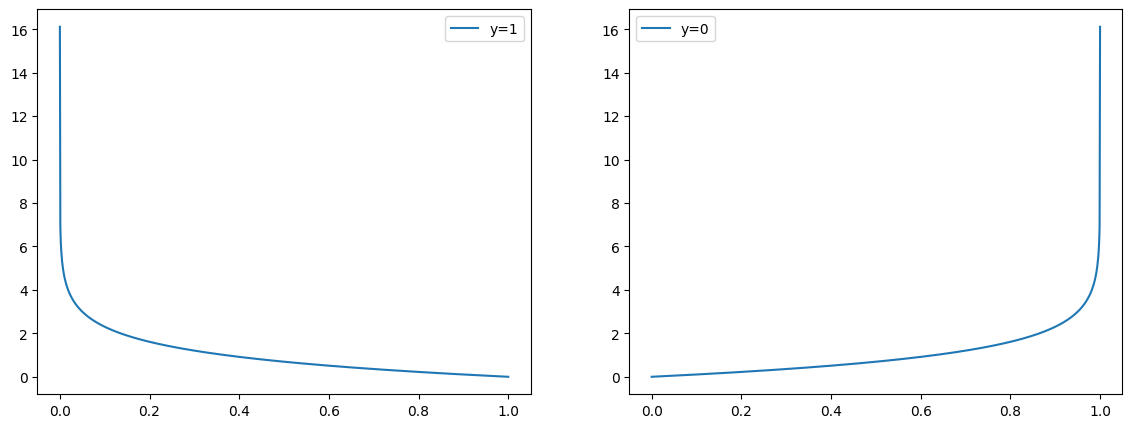

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
ax1.plot(ps,y1,label='y=1')
ax2.plot(ps,y0,label='y=0')
ax1.legend()
ax2.legend()

#### Without clippping

In [9]:
ps = numpy.linspace(1e-9,1-1e-9,1000).reshape(-1,1)
y1 = [ bcost.compute(numpy.array([1]),p,clip=False) for p in ps ]
y0 = [ bcost.compute(numpy.array([0]),p,clip=False) for p in ps ]

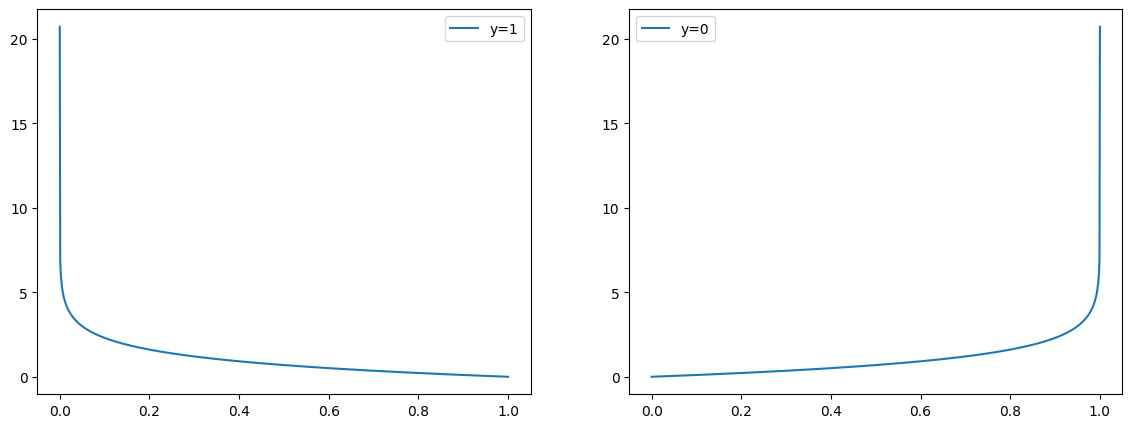

In [10]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
ax1.plot(ps,y1,label='y=1')
ax2.plot(ps,y0,label='y=0')
ax1.legend()
ax2.legend()

## Cross Entropy

In [11]:
ce = CrossEntropy()

### Iris dataset

In [12]:
iris = IrisDatasetDownloader()
iris.load_dataset()


In [13]:
print(iris.description)


        1. Title: Iris Plants Database
            Updated Sept 21 by C.Blake - Added discrepency information

        2. Sources:
            (a) Creator: R.A. Fisher
            (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
            (c) Date: July, 1988

        3. Past Usage:
            - Publications: too many to mention!!!  Here are a few.
        1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
            Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
            to Mathematical Statistics" (John Wiley, NY, 1950).
        2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
            (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
        3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
            Structure and Classification Rule for Recognition in Partially Exposed
            Environments".  IEEE Transactions on Pattern Analysis and Machine
        

In [14]:
print(iris.data.shape,iris.target.shape)

(150, 4) (150, 1)


In [15]:
print(iris.target_names)

['setosa', 'versicolor', 'virginica']


In [16]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [17]:
print(iris.data[:5,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [18]:
print(iris.target[:5,:])

[[0]
 [0]
 [0]
 [0]
 [0]]


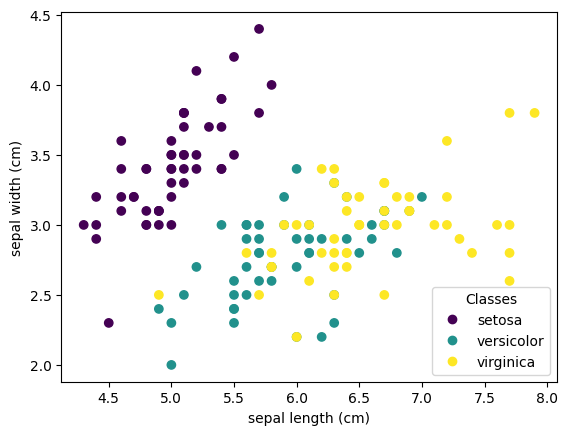

In [19]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [20]:
dum_classifier = numpy.random.random((len(iris.target),3))
dum_classifier/=dum_classifier.sum(axis=1,keepdims=True)
print(dum_classifier.shape)
dum_classifier[:5,:]

(150, 3)


array([[0.32070534, 0.33122148, 0.34807317],
       [0.35239635, 0.4937481 , 0.15385555],
       [0.39613891, 0.32460282, 0.27925826],
       [0.19787322, 0.70485702, 0.09726976],
       [0.37149046, 0.47118845, 0.15732109]])

In [21]:
from neural_net.pipeline import onehot

In [22]:
y = onehot(iris.target)
print(y.shape)
y[:5,:]

(150, 3)


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [23]:
ce.compute(dum_classifier,y)

7.167997654031883

In [24]:
round(ce.compute(y,y))

0

### Properties

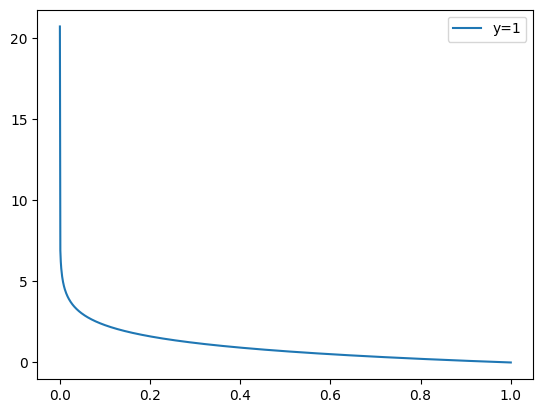

In [25]:
ps = numpy.linspace(1e-9,1-1e-9,1000).reshape(-1,1)
y = [ ce.compute(numpy.array([1]),p,clip=False) for p in ps ]
fig,ax1 = plt.subplots()
ax1.plot(ps,y,label='y=1')
ax1.legend()

## Mean Squared Error

In [8]:
mse = MSE()

### Boston Housing

In [9]:
housing = HouseDatasetDownloader()
housing.load_dataset()

In [10]:
print(housing.description)

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        100

In [11]:
print(housing.columns)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [12]:
print(housing.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]


In [13]:
print(housing.data.shape)

(506, 14)


#### Correlations

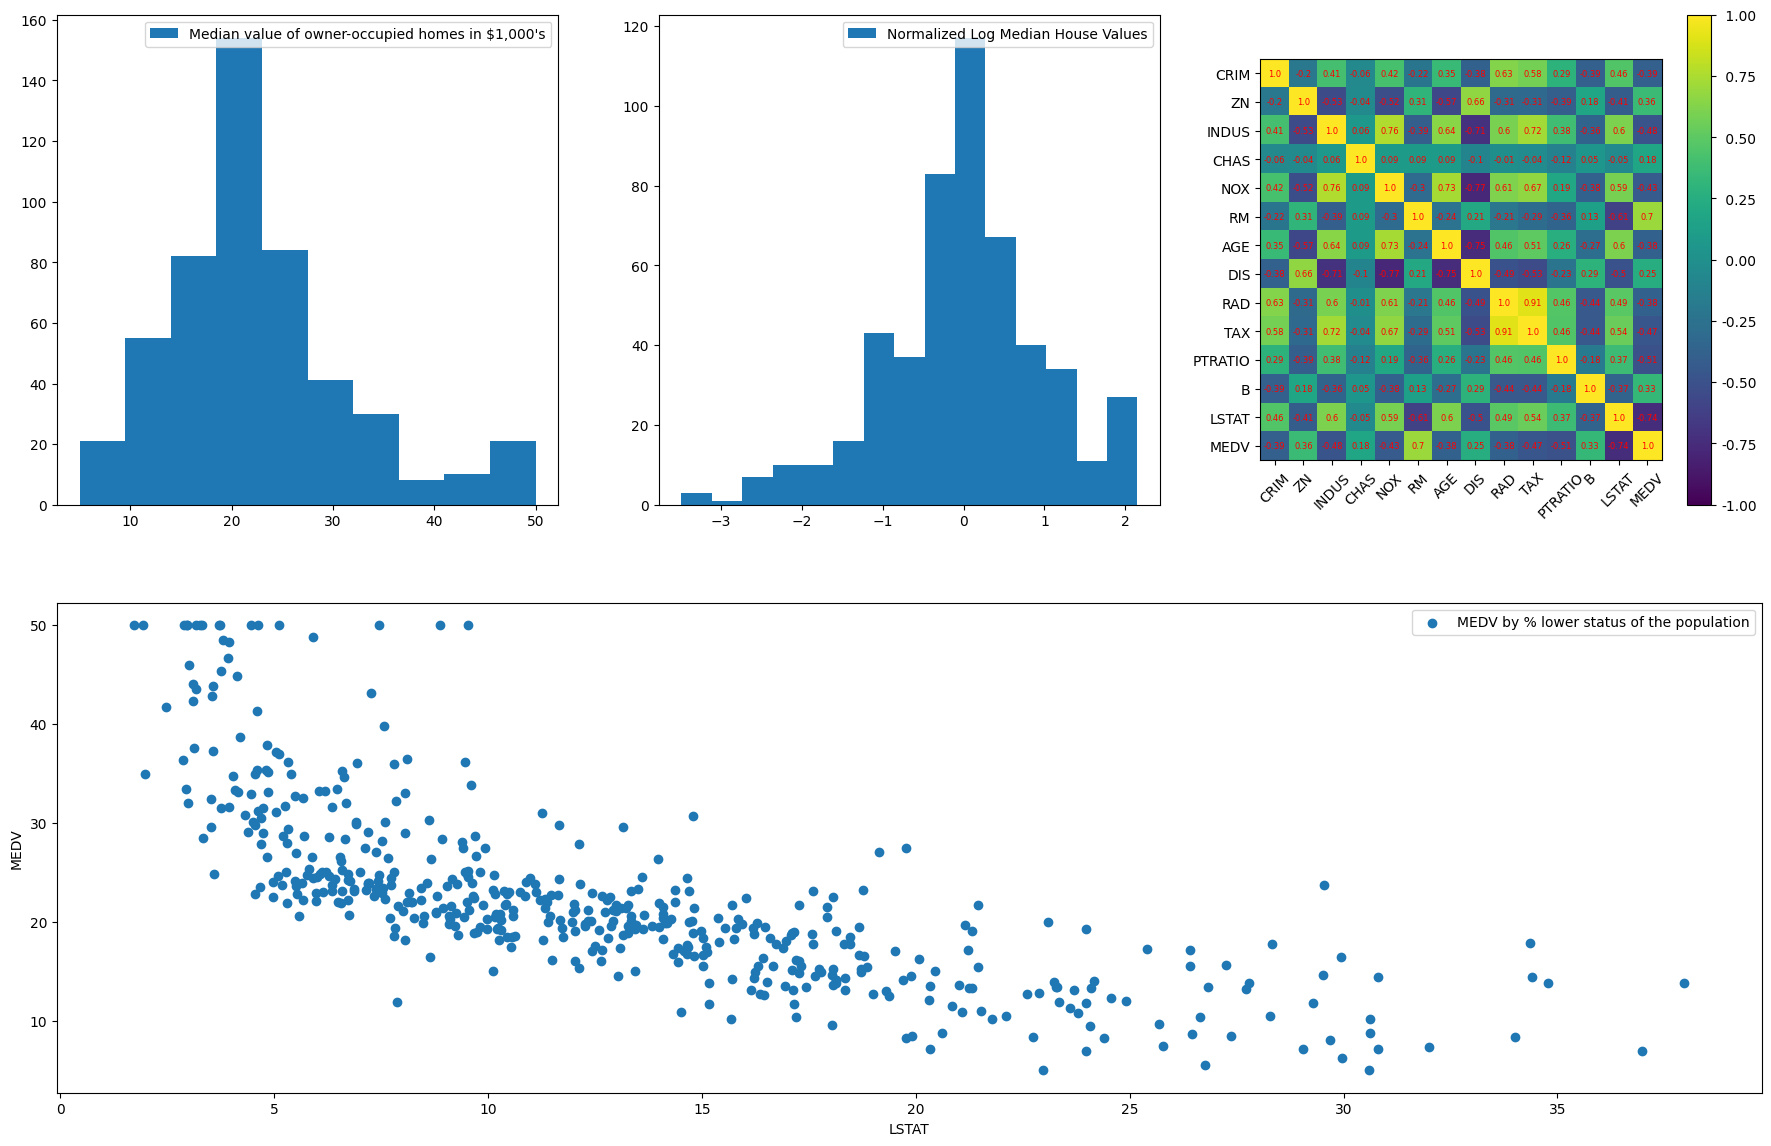

In [14]:

fig = plt.figure(figsize=(22,14))

gs  = fig.add_gridspec(2,3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

ax4 = fig.add_subplot(gs[1, :])



ax1.hist(housing.data[:,-1],label="Median value of owner-occupied homes in $1,000's",bins=10)
ax1.legend()
ax2.hist(((lp:=numpy.log(housing.data[:,-1]))-lp.mean())/lp.std(),label='Normalized Log Median House Values',bins=15)
ax2.legend()
corr = Pearson(housing.data,cols=housing.columns)
corr.corr()
ax4.scatter(x=housing.data[:,-2],y=housing.data[:,-1],label='MEDV by % lower status of the population' )

ax4.set_xlabel("LSTAT")
ax4.set_ylabel("MEDV")
ax4.legend()

corr.heatmap(ax=ax3,digits=2)



#### Ordinary Least Squares

In [31]:
X = numpy.c_[housing.data[:,[-2]],numpy.ones((len(housing.data),1))]
y = housing.data[:,[-1]]
XtX = X.T.dot(X)
XTXinv = numpy.linalg.inv(XtX)  
βhat = XTXinv.dot(X.T.dot(y))

pred = X.dot(βhat)
ε = y-pred

sigmaε,meanε = ε.std(),ε.mean()
print(sigmaε,meanε)

Varβ = sigmaε**2 * XTXinv

βhat

6.20346413142642 -1.842355868215912e-14


array([[-0.95004935],
       [34.55384088]])

In [32]:
student = βhat/Varβ.diagonal().reshape(-1,1)**.5
student

array([[-24.57651813],
       [ 61.53688032]])

In [18]:
import scipy.stats 
  
p_value = scipy.stats.norm.sf(abs(student)) 
p_value

array([[0.],
       [0.]])

In [33]:
SSE = (ε**2).sum()
SStot = ((y-y.mean())**2).sum()
R2 = 1 - SSE/SStot
R2

0.5441462975864797

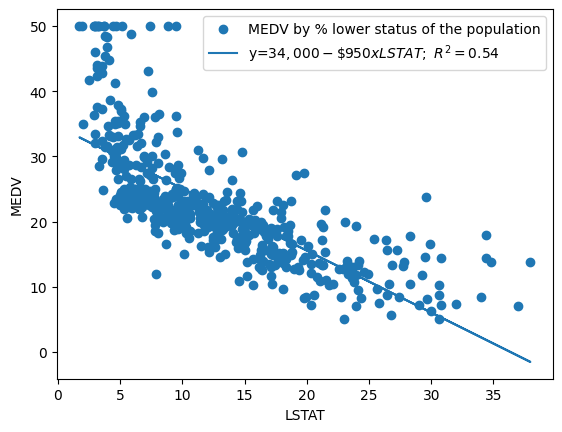

In [34]:
plt.scatter(x=housing.data[:,-2],y=housing.data[:,-1],label='MEDV by % lower status of the population' )
plt.plot(housing.data[:,-2],pred,label="y=$34,000 - \$950xLSTAT;\ R^{2}=$"+f'{R2:.2}')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.legend()

#### Computing mse

In [55]:
mse = MSE()

In [12]:
mse.compute(y,pred)

38.48296722989415

In [13]:
mse.compute(y,y)

0.0

#### Residual Analysis

In [70]:
probs = numpy.linspace(0,1,100)
εquantiles = numpy.quantile(ε,probs)
theoratical = numpy.random.normal(loc=meanε,scale=sigmaε,size=10000)
normal_quantiles = numpy.quantile(theoratical,probs)

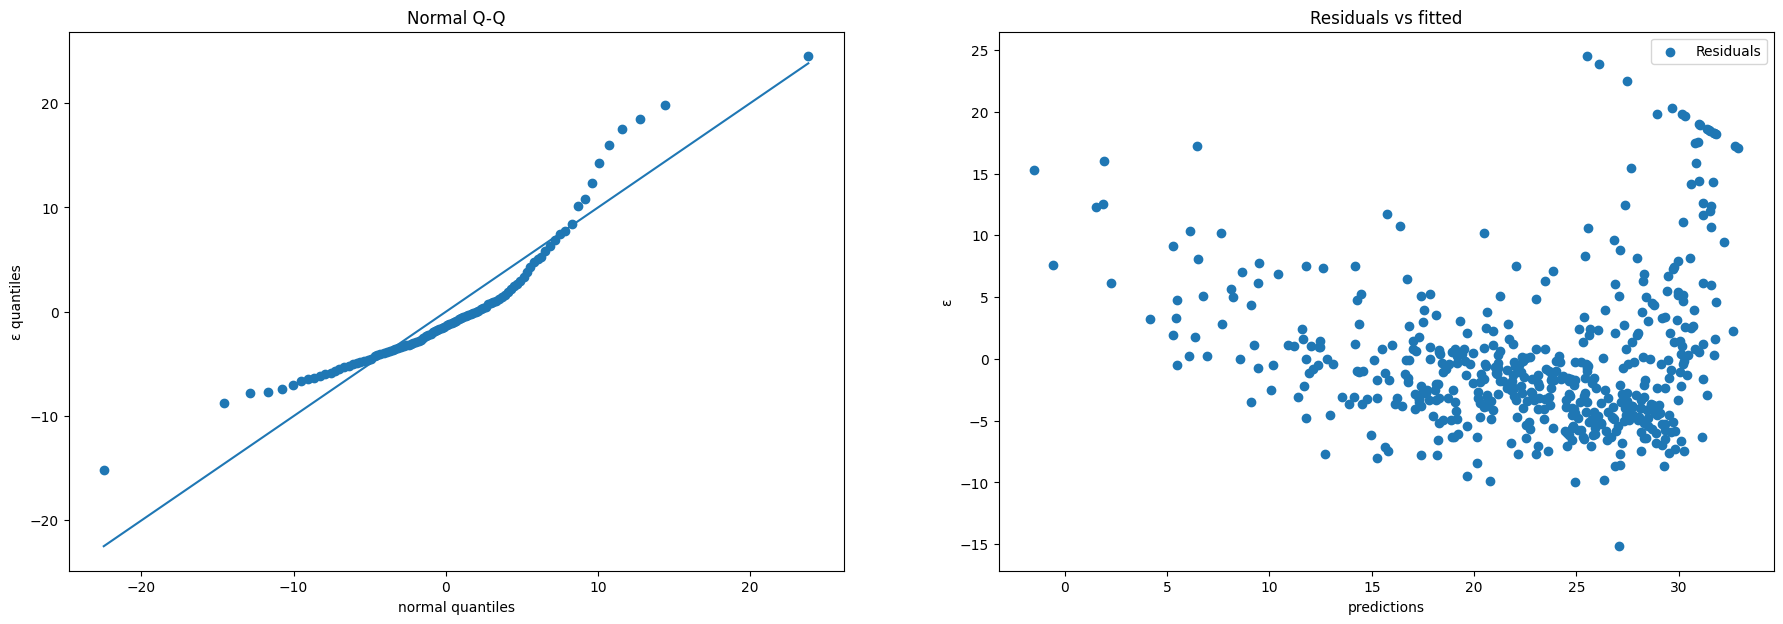

In [79]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(22,7))

ax1.scatter(normal_quantiles,εquantiles,label='Residual quantiles')
ax1.plot(normal_quantiles,normal_quantiles,label='theoratical normal')
ax1.set_title("Normal Q-Q")
ax1.set_xlabel("normal quantiles")
ax1.set_ylabel("ε quantiles")


ax2.scatter(pred,ε,label=r"Residuals")
ax2.set_title(r"Residuals vs fitted")
ax2.set_xlabel("predictions")
ax2.set_ylabel("ε")
ax2.legend()

In [42]:
coeffs = []
for (x_new,y_new) in Boostrap((X,y),n_sample=1000):
    β_new = numpy.linalg.inv(x_new.T.dot(x_new)).dot(x_new.T.dot(y_new))
    coeffs.append(β_new)

In [43]:
coeffs = numpy.concatenate(coeffs,axis=1).T

In [45]:
coeffs.mean(axis=0)

array([-0.95703057, 34.62544147])

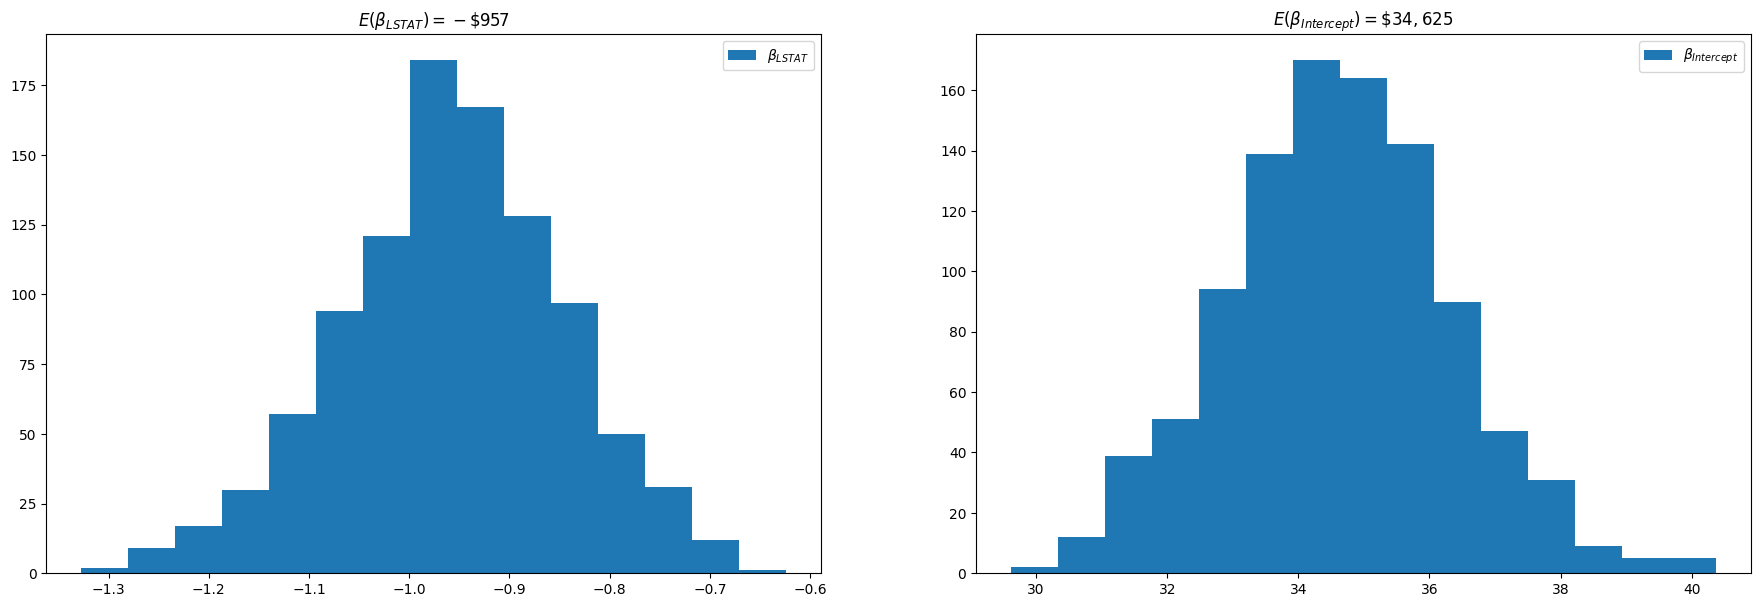

In [54]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(22,7))


ax1.hist(coeffs[:,0],label=r"$\beta_{LSTAT}$",bins=15)
ax1.set_title(r"$E(\beta_{LSTAT})=-\$957$")
ax1.legend()
ax2.hist(coeffs[:,1],label=r"$\beta_{Intercept}$",bins=15)
ax2.set_title(r"$E(\beta_{Intercept})=\$34,625$")
ax2.legend()


# Backpropagation

## Output Layer

In [127]:
network.steps[-1].outfuncs[0].outid

139944190976304

In [128]:
network.steps[-1].update({139944190976304:y})

{139944190981584: array([[0.  ],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.25],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.25],
        [0.25],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.25],
        [0.25],
        [0.  ],
        [0.  ],
        [0.25],
        [0.25],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.  ],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.  ],
        [0.  ],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.  ],
        [0.  ],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.  ],
        [0.25],
       

In [130]:
Δ = network.steps[-1].update({139944190976304:y})

## Last Linear Layer

In [131]:
network.steps[-2]

In [132]:
len(network.steps[-2].In)

10

In [133]:
list(network.steps[-2].In.values())[0].shape

(300, 1)

In [134]:
network.steps[-2].In.values()

dict_values([array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       

In [135]:
len(network.steps[-2].outfuncs)

1

In [136]:
Δ = network.steps[-2].update(Δ)
Δ

{139944190483344: array([[ 0.        ],
        [-0.02229167],
        [-0.02229167],
        [-0.02229167],
        [-0.02229167],
        [-0.02229167],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [-0.02229167],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [-0.02229167],
        [-0.02229167],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [-0.02229167],
        [-0.02229167],
        [ 0.        ],
        [ 0.        ],
        [-0.02229167],
        [-0.02229167],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [-0.02229167],
        [-0.02229167],
        [-0.02229167],
        [-0.02229167],
        [-0.02229167],
        [-0.02229167],
        [ 0.        ],
        [-0.02229167],
        [-0.02229167],
        [-0.02229167],
        [-0.02229167],
        [ 0.        ],
        [ 0.        ],
        [-0.02229

In [137]:
%%sql
SELECT * 
FROM
weights


 * sqlite:////home/analyst/notebooks/neural_net/run/model20240223130131.db
   sqlite:///network.db_path
Done.


id,weight_id,neuron_id,created_at,updated_at,value
1,0,139944266525968,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
2,1,139944266525968,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
3,2,139944266525968,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
4,0,139944266482704,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
5,1,139944266482704,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
6,2,139944266482704,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
7,0,139944190815824,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
8,1,139944190815824,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
9,2,139944190815824,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
10,0,139944190815952,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0


## Update method

In [138]:
network.update({139944190976304:y})

In [139]:
%%sql
SELECT *
from weights

 * sqlite:////home/analyst/notebooks/neural_net/run/model20240223130131.db
   sqlite:///network.db_path
Done.


id,weight_id,neuron_id,created_at,updated_at,value
1,0,139944266525968,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
2,1,139944266525968,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
3,2,139944266525968,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
4,0,139944266482704,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
5,1,139944266482704,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
6,2,139944266482704,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
7,0,139944190815824,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
8,1,139944190815824,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
9,2,139944190815824,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0
10,0,139944190815952,2024-02-23 13:02:33,2024-02-23 13:02:33,0.0


# Logistic Regression

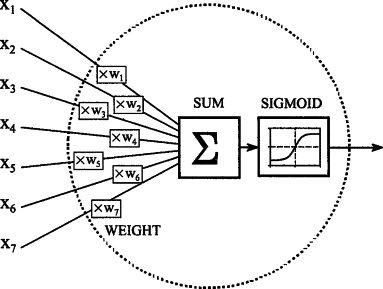

## Pure numpy definition

In [8]:
H_θ = lambda X,θ : 1/(1+numpy.exp(-X.dot(θ)))
θ = numpy.zeros((k,1))
H_θ(X,θ).shape

(300, 1)

## Using layers

In [9]:
LogReg = architecture.Sequential(
        [
        layers.fullyconnected(n_in=2,n_out=1),
        layers.activation(n_in=1,n_out=1,func=activation_funcs.σ)
        ],
    cost_func= loss.binaryCrossEntropy
    )
LogReg.predict(X)[0][1].shape

(300, 1)

## Computing Gradients

### Analytic gradient
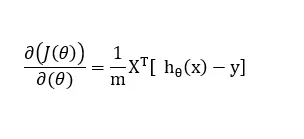

In [10]:
J = lambda θ : 1/n*X.T.dot(H_θ(X,θ)-y)
J(θ)

array([[0.16650187],
       [0.16109324]])

### Chain rule logistic Regression

In [155]:
%%HTML
  <iframe
      src="https://web.stanford.edu/class/archive/cs/cs109/cs109.1192/lectureNotes/25%20-%20LogisticRegression.pdf"
      width="100%"
      height="600px"
      loading="lazy"
      title="PDF-file"
  ></iframe>



In [167]:
p0 = LogReg.cost_func(y,LogReg.predict(X)).prime()
p1 = LogReg.steps[-1].update({LogReg.outid:p0})
p2 = LogReg.steps[-2].update(p1)
LogReg.steps[-2].outfuncs[0].w

array([[-0.15930924],
       [-0.15490416],
       [ 0.16666667]])

# Softmax Regression( k target items and j=1,..,n instances)

$$
{\displaystyle \sigma (\mathbf {z} )_{j}={\frac {\mathrm {e} ^{z_{j}}}{\sum _{k=1}^{K}\mathrm {e} ^{z_{k}}}}}
$$

## Analytical gradient

In [176]:
y_one_hot = utils.onehot(y)
y_one_hot

array([[0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0,

In [177]:
W = numpy.zeros((X.shape[1]+1,2))
W

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [178]:
W = numpy.zeros((X.shape[1],2))
Softmax = lambda W,X : numpy.exp(X.dot(W))/numpy.exp(X.dot(W)).sum(axis=1).reshape(-1,1)
Softmax(W,X)

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5,

In [179]:
J = 1/len(X)*X.T.dot(Softmax(W,X)-y_one_hot)
J

array([[-0.15930924,  0.15930924],
       [-0.15490416,  0.15490416]])

### Chain rule

In [181]:
softmax = architecture.Sequential(
        [
        layers.fullyconnected(n_in=2,n_out=2),
        layers.activation(n_in=2,n_out=1,func=activation_funcs.Softmax)
        ],
    cost_func= loss.CrossEntropy
    )

In [182]:
grad0 = softmax.cost_func(y_one_hot, softmax.eval(X)).prime()
grad0.shape

(300, 2)

In [183]:
grad1 = softmax.steps[-1].update({softmax.outid:grad0})

In [184]:
grad2 = softmax.steps[-2].update(grad1)

In [186]:
softmax.steps[-2].outfuncs[0].w

array([[ 0.15930924],
       [ 0.15490416],
       [-0.16666667]])

In [187]:
softmax.steps[-2].outfuncs[1].w

array([[-0.15930924],
       [-0.15490416],
       [ 0.16666667]])

# Training

In [11]:
n_epoch = 1000
α = 0.1

## Logistic Regression

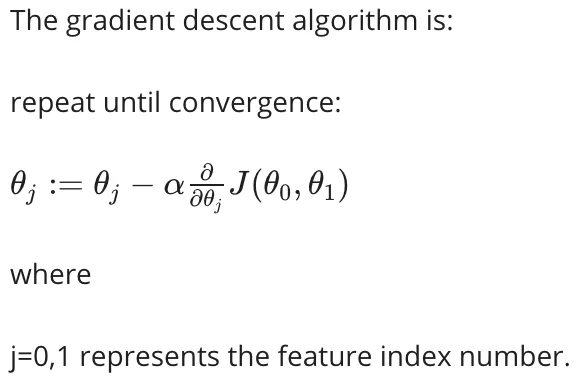

### Using analytical gradient

In [12]:
for _ in range(n_epoch):
    θ -= α*J(θ)

In [13]:
θ

array([[-3.43249863],
       [-3.52608663]])

In [14]:
pred = (H_θ(X,θ) > .5 )+0

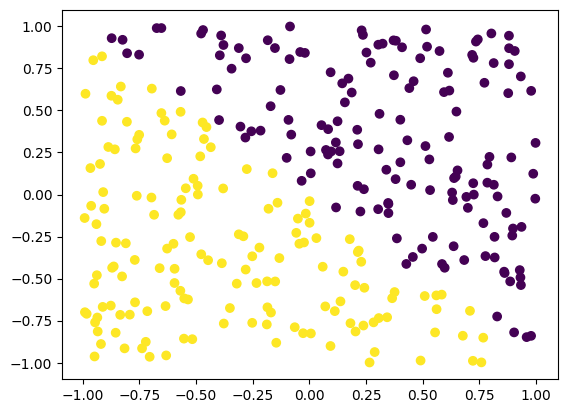

In [15]:
plt.scatter(x=X[:,0],y=X[:,1],c=pred)

### Using chain rule

In [222]:
LogReg = architecture.Sequential(
        [
        layers.fullyconnected(n_in=2,n_out=1),
        layers.activation(n_in=1,n_out=1,func=activation_funcs.σ)
        ],
    cost_func= loss.binaryCrossEntropy
    )
for _ in range(n_epoch):
    grad0 = LogReg.cost_func(y,LogReg.eval(X)).prime()
    grad1 = LogReg.steps[-1].update({LogReg.outid:grad0})
    grad2 = LogReg.steps[-2].update(grad1)

In [223]:
LogReg.steps[-2].outfuncs[0].w

array([[-9.55284204],
       [-9.51711004],
       [ 3.24727624]])

In [224]:
_,p = LogReg.eval(X)[0]

In [225]:
p = (p>.5)+0

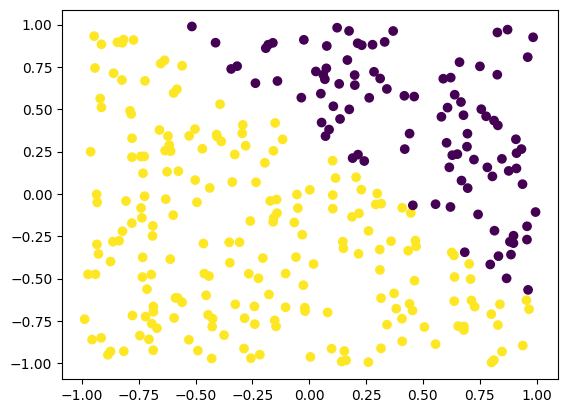

In [226]:
plt.scatter(x=X[:,0],y=X[:,1],c=p)

### Using train method

In [229]:
LogReg = architecture.Sequential(
        [
        layers.fullyconnected(n_in=2,n_out=1),
        layers.activation(n_in=1,n_out=1,func=activation_funcs.σ)
        ],
    cost_func= loss.binaryCrossEntropy
    )
LogReg.train(X,y,n_epochs=n_epoch)

In [230]:
LogReg.steps[-2].outfuncs[0].w

array([[-9.55284204],
       [-9.51711004],
       [ 3.24727624]])

## Softmax

### Using Softmax analytical solution

In [231]:
k=2
W = numpy.zeros((X.shape[1],k))
Softmax = lambda W,X : numpy.exp(X.dot(W))/numpy.exp(X.dot(W)).sum(axis=1).reshape(-1,1)
J_W = lambda W,X : 1/n*X.T.dot(Softmax(W,X)-y_one_hot)

for _ in range(n_epoch):
    W -= α*J_W(W,X) 

In [232]:
W

array([[ 2.07176793, -2.07176793],
       [ 2.1469769 , -2.1469769 ]])

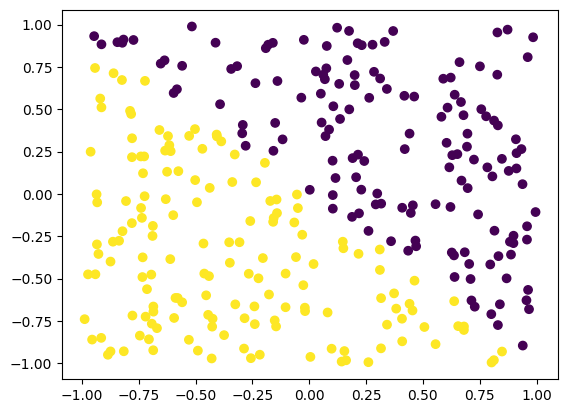

In [234]:
p = Softmax(W,X).argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p)

### Chain rule

In [235]:
softmax = architecture.Sequential(
        [
        layers.fullyconnected(n_in=2,n_out=2),
        layers.activation(n_in=2,n_out=1,func=activation_funcs.Softmax)
        ],
    cost_func= loss.CrossEntropy
    )

In [236]:
for _ in range(n_epoch):
    grad0 = softmax.cost_func(y_one_hot,softmax.eval(X)).prime()
    grad1 = softmax.steps[-1].update({softmax.outid:grad0})
    grad2 = softmax.steps[-2].update(grad1)

In [237]:
softmax.steps[-2].outfuncs[0].w

array([[ 6.05844646],
       [ 6.03660202],
       [-2.03310745]])

In [238]:
softmax.steps[-2].outfuncs[1].w

array([[-6.05844646],
       [-6.03660202],
       [ 2.03310745]])

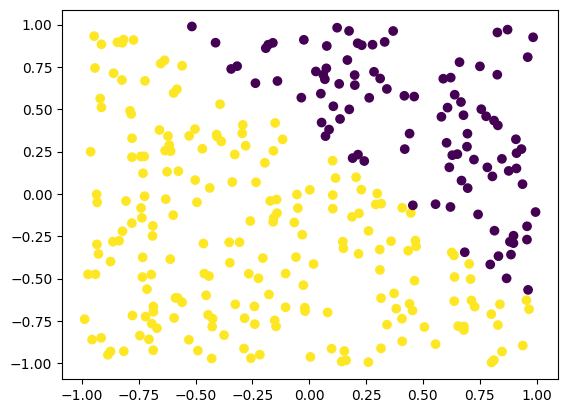

In [239]:
p = softmax.eval(X)[0][1].argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p)

# Generating Non linear data

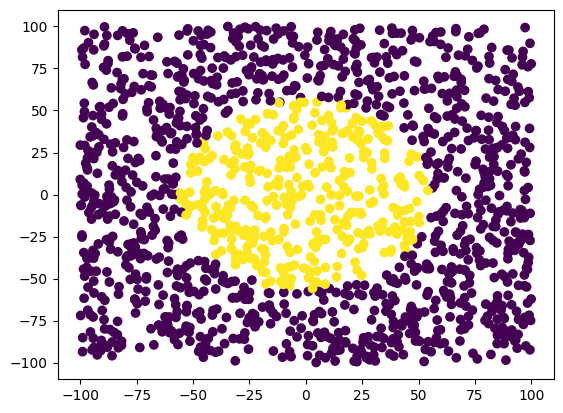

In [44]:
n,k = 1500,2
X = numpy.random.uniform(-100,100,size=(n,k))
y =( (X[:, 0]**2 + X[:, 1]**2)/numpy.pi < 1000).reshape(-1,1)+0
y_one_hot = utils.onehot(y)
plt.scatter(x=X[:,0],y=X[:,1],c=y)

# Beyond linear architecture

## Logistic regression

In [29]:
H_θ = lambda X,θ : 1/(1+numpy.exp(-X.dot(θ)))
θ = numpy.zeros((k,1))
for _ in range(20000):
    θ -= α*J(θ)

In [30]:
p = H_θ(X,θ)

In [31]:
y.shape

(1500, 1)

In [36]:
((p>.5 )==y).sum()/len(y)

0.5073333333333333

## Softmax

In [37]:
k=2
W = numpy.zeros((X.shape[1],k))
Softmax = lambda W,X : numpy.exp(X.dot(W))/numpy.exp(X.dot(W)).sum(axis=1).reshape(-1,1)
J_W = lambda W,X : 1/n*X.T.dot(Softmax(W,X)-y_one_hot)

for _ in range(20000):
    W -= α*J_W(W,X) 

In [45]:
p = Softmax(W,X).argmax(axis=1).reshape(-1,1)
(p==y).sum()/len(y)

0.5073333333333333

# Neural network

## Xavier and He Initialization methods

We don’t want the signal to die out, nor do we want it to explode and saturate.

For the signal to flow properly, the authors argue that we need the variance of the outputs of each layer to be equal to the variance of its inputs

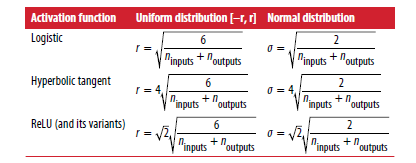

In [8]:
ann = architecture.Sequential(
        [
        layers.fullyconnected(n_in=2,n_out=10,init_method=init_funcs.XHReluuniform),
        layers.activation(n_in=10,n_out=10,func=activation_funcs.LeakyReLU),
        
            
        layers.fullyconnected(n_in=10,n_out=2,init_method=init_funcs.XHReluuniform),
        layers.activation(n_in=2,n_out=1,func=activation_funcs.Softmax)
        ],
    cost_func= loss.CrossEntropy
    )

In [9]:
ann.train(
    utils.scaler(X),
        utils.onehot(y),n_epochs=100,batch_size=700, α=.3,metrics=metrics.accuracy)

epoch 0 CrossEntropy 0.6263367917665422 accuracy 0.58
epoch 1 CrossEntropy 0.5558926088444918 accuracy 0.69
epoch 2 CrossEntropy 0.5229819177270822 accuracy 0.69
epoch 3 CrossEntropy 0.5024024551663185 accuracy 0.69
epoch 4 CrossEntropy 0.48868478703558227 accuracy 0.69
epoch 5 CrossEntropy 0.47852912777436507 accuracy 0.69
epoch 6 CrossEntropy 0.470602289103134 accuracy 0.69
epoch 7 CrossEntropy 0.4636703237144171 accuracy 0.69
epoch 8 CrossEntropy 0.45746532311344995 accuracy 0.69
epoch 9 CrossEntropy 0.45166875805173007 accuracy 0.69
epoch 10 CrossEntropy 0.44604332012348524 accuracy 0.69
epoch 11 CrossEntropy 0.4405378872675416 accuracy 0.69
epoch 12 CrossEntropy 0.43514158779537 accuracy 0.69
epoch 13 CrossEntropy 0.4298938576561706 accuracy 0.69
epoch 14 CrossEntropy 0.42462159460849686 accuracy 0.7
epoch 15 CrossEntropy 0.41941356819084513 accuracy 0.71
epoch 16 CrossEntropy 0.4143304855140617 accuracy 0.71
epoch 17 CrossEntropy 0.4092633249143428 accuracy 0.72
epoch 18 CrossEnt

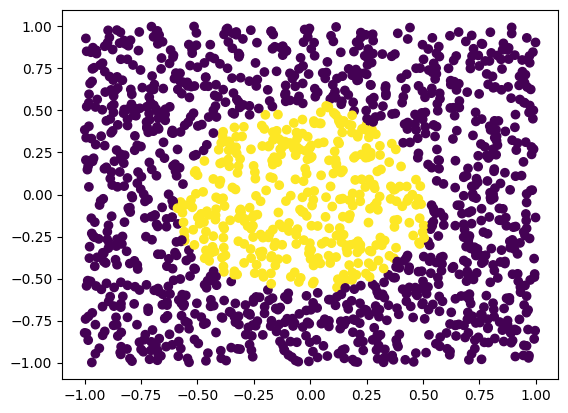

In [26]:
p = ann.eval(utils.scaler(X))[0][1].argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p)

In [11]:
ann.train(
    utils.scaler(X),
        utils.onehot(y),n_epochs=30,batch_size=300, α=.3,metrics=metrics.accuracy)

epoch 0 CrossEntropy 0.1471275362172014 accuracy 0.9666666666666667
epoch 1 CrossEntropy 0.14574563942902616 accuracy 0.9633333333333334
epoch 2 CrossEntropy 0.144358699392034 accuracy 0.9633333333333334
epoch 3 CrossEntropy 0.14297590963621493 accuracy 0.9633333333333334
epoch 4 CrossEntropy 0.14164135751757798 accuracy 0.9633333333333334
epoch 5 CrossEntropy 0.14036326691219664 accuracy 0.9633333333333334
epoch 6 CrossEntropy 0.13909978358509914 accuracy 0.9633333333333334
epoch 7 CrossEntropy 0.13784900363607255 accuracy 0.9633333333333334
epoch 8 CrossEntropy 0.136646084953861 accuracy 0.96
epoch 9 CrossEntropy 0.13546284506594267 accuracy 0.96
epoch 10 CrossEntropy 0.13430244013552245 accuracy 0.96
epoch 11 CrossEntropy 0.13316798082322415 accuracy 0.96
epoch 12 CrossEntropy 0.13204950497797158 accuracy 0.9633333333333334
epoch 13 CrossEntropy 0.13096885926202456 accuracy 0.9633333333333334
epoch 14 CrossEntropy 0.12990821194605615 accuracy 0.9633333333333334
epoch 15 CrossEntropy

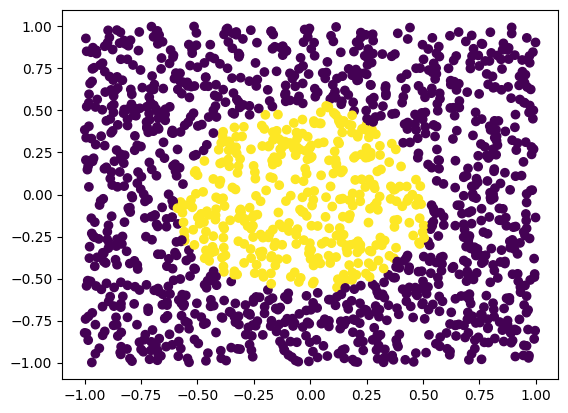

In [25]:
p = ann.eval(utils.scaler(X))[0][1].argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p)

In [13]:
ann.train(
    utils.scaler(X),
        utils.onehot(y),n_epochs=50, α=.3,metrics=metrics.accuracy)

epoch 0 CrossEntropy 0.1208973718526618 accuracy 0.97
epoch 1 CrossEntropy 0.12073486177856503 accuracy 0.97
epoch 2 CrossEntropy 0.12057563296655799 accuracy 0.97
epoch 3 CrossEntropy 0.12041847144775701 accuracy 0.97
epoch 4 CrossEntropy 0.12026268072982155 accuracy 0.97
epoch 5 CrossEntropy 0.12010718522324064 accuracy 0.9706666666666667
epoch 6 CrossEntropy 0.11995285916453356 accuracy 0.9706666666666667
epoch 7 CrossEntropy 0.11979997244418837 accuracy 0.9706666666666667
epoch 8 CrossEntropy 0.11964786256025134 accuracy 0.9706666666666667
epoch 9 CrossEntropy 0.11949650165775962 accuracy 0.9706666666666667
epoch 10 CrossEntropy 0.119346800556277 accuracy 0.9706666666666667
epoch 11 CrossEntropy 0.11919777971593543 accuracy 0.9706666666666667
epoch 12 CrossEntropy 0.11904948430802118 accuracy 0.9706666666666667
epoch 13 CrossEntropy 0.11890245579841974 accuracy 0.9706666666666667
epoch 14 CrossEntropy 0.11875557360216986 accuracy 0.9706666666666667
epoch 15 CrossEntropy 0.118609902

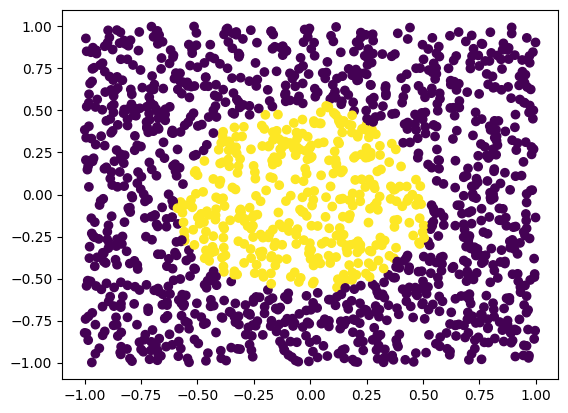

In [24]:
p = ann.eval(utils.scaler(X))[0][1].argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p)

In [16]:
ann.train(
    utils.scaler(X),
        utils.onehot(y),n_epochs=1000, α=1,metrics=metrics.accuracy)

epoch 0 CrossEntropy 0.08302584790345359 accuracy 0.9793333333333333
epoch 1 CrossEntropy 0.08287116716587514 accuracy 0.9793333333333333
epoch 2 CrossEntropy 0.08271760986584309 accuracy 0.9793333333333333
epoch 3 CrossEntropy 0.08256506516250676 accuracy 0.9793333333333333
epoch 4 CrossEntropy 0.08241371524808148 accuracy 0.9793333333333333
epoch 5 CrossEntropy 0.08226338647747691 accuracy 0.9793333333333333
epoch 6 CrossEntropy 0.08211384825207513 accuracy 0.98
epoch 7 CrossEntropy 0.08196547680120722 accuracy 0.98
epoch 8 CrossEntropy 0.08181672276635309 accuracy 0.98
epoch 9 CrossEntropy 0.08166935814152901 accuracy 0.98
epoch 10 CrossEntropy 0.08152301033605758 accuracy 0.98
epoch 11 CrossEntropy 0.08137754379093991 accuracy 0.98
epoch 12 CrossEntropy 0.08123314011490265 accuracy 0.9813333333333333
epoch 13 CrossEntropy 0.08108904769906633 accuracy 0.9813333333333333
epoch 14 CrossEntropy 0.0809458335102 accuracy 0.9813333333333333
epoch 15 CrossEntropy 0.08080250814249626 accura

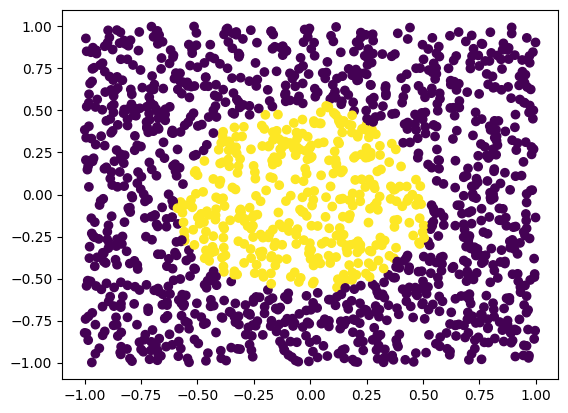

In [23]:
p = ann.eval(utils.scaler(X))[0][1].argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p)

In [27]:
(p.reshape(-1,1) == y).sum()/len(y)

0.9706666666666667

# Optical character recognition(OCR)
Hand written digits

In [66]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

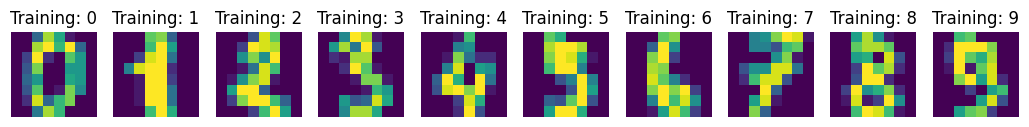

In [40]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(13, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image)
    ax.set_title("Training: %i" % label)

In [49]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target.reshape(-1,1), test_size=0.5, shuffle=False
)

In [50]:
X_train.shape,y_train.shape

((898, 64), (898, 1))

In [77]:
k=10
W = numpy.zeros((X_train.shape[1],k))
Softmax = lambda W,X : numpy.exp(X.dot(W))/numpy.exp(X.dot(W)).sum(axis=1).reshape(-1,1)
J_W = lambda W,X : 1/n*X.T.dot(Softmax(W,X)-utils.onehot(y_train))

for _ in range(20000):
    W -= .1*J_W(W,X_train) 

In [78]:
predicted = Softmax(W,X_test).argmax(axis=1)

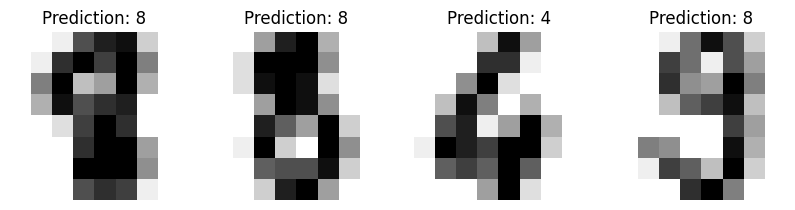

In [79]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [80]:
print(
    f"Classification report for classifier :\n"
    f"{classification_report(y_test, predicted)}\n"
)

Classification report for classifier :
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        88
           1       0.94      0.90      0.92        91
           2       1.00      0.98      0.99        86
           3       0.94      0.85      0.89        91
           4       0.98      0.89      0.93        92
           5       0.89      0.95      0.91        91
           6       0.89      0.99      0.94        91
           7       0.97      0.94      0.95        89
           8       0.90      0.92      0.91        88
           9       0.83      0.92      0.88        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899




Confusion matrix:
[[84  0  0  0  1  0  3  0  0  0]
 [ 0 82  0  1  0  1  1  0  1  5]
 [ 0  0 84  2  0  0  0  0  0  0]
 [ 0  0  0 77  0  4  0  2  7  1]
 [ 0  0  0  0 82  0  6  0  0  4]
 [ 0  1  0  0  0 86  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  1  1  0 84  0  3]
 [ 0  3  0  0  0  3  0  0 81  1]
 [ 1  0  0  2  0  2  0  1  1 85]]


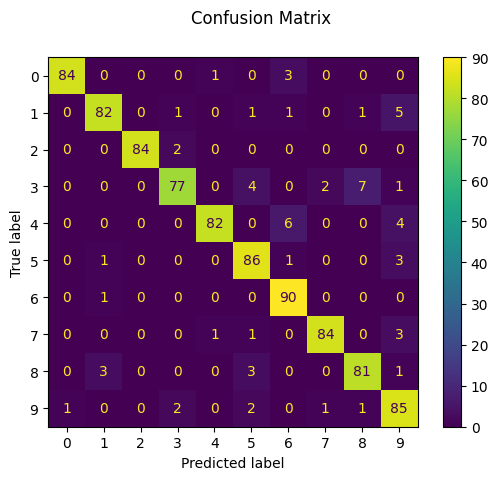

In [81]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()